# Списки и генераторы

Для работы с последовательностями объектов предусмотрены такие объекты, как списки и генераторы.

Для задания списка служит конструкция `[..]`:

In [ ]:
l = [1,2,3,4,5,6,7,8,9,10]
print(l)

Можно обращаться к элементам списка по номеру:

In [ ]:
l[5]

Как видно, нумерация осуществляется с нуля.

Отрицательные номера позволяют нумеровать элементы списка с конца:

In [ ]:
l[-1]

Можно выделять подсписок с помощью **интервалов**. Интервал в общем виде имеет вид `начало:конец:шаг`. Например:

In [ ]:
print("Элементы с 3-го по 8-ой:", l[3:8])
print("Элементы с 3-го по 8-ой с шагом 2:", l[3:8:2])
print("Элементы с начала по 5-й:", l[:5])
print("Элементы с начала до конца, в обратном порядке (с шагом -1):", l[::-1])

Для обхода все элементов списка можно использовать `for`:

In [ ]:
for x in l:
    print(x, end=' ')

Переменная списка является **ссылкой** на сам список. Поэтому, при присваивании `l2=l1` переменные начинают указывать на один и тот же список. Модифицируя один список, мы изменяем и другой.

In [ ]:
l1 = [1,2,3]
l2 = l1
l2.append(4)
l1.extend([5,6])
print(l1,l2)

Чтобы создать копию списка, надо использовать специальный приём:

In [ ]:
l1 = [1,2,3]
l2 = l1[:]
l3 = l1.copy()
l2.append(4)
l3.extend([5,6])
print(l1,l2,l3)

## Списковые функции

Для получения суммы элементов списка можно использовать `sum`: 

In [ ]:
print(sum(l))

Интересно, что `sum` можно использовать не только для чисел, а, например, для объединения списков. Для этого в качестве начального элемента (параметр `start`) надо задать пустой список:

In [ ]:
sum([[1,2],[3,4],[5,6,7]],[])

Если нам нужно объединить строковые данные, то лучше использовать `join`:

In [ ]:
ls = ['раз','два','три']
', '.join(ls)

Предположим, мы хотим объединить элементы числового списка в строку:

In [ ]:
','.join(l)

Возникает ошибка, поскольку аргументом `join` должен быть список строк. Нам нужно применить функцию преобразования типа `str` ко всем элементам списка `l`. Для этого служить встроенная функция `map`:

In [ ]:
', '.join(map(str,l))

С помощью `map` можно, например, умножить все элементы списка на 2. Однако, поскольку встроенной функции умножения на 2 нет, а писать отдельную функцию для этого не хочется, можно использовать специальный механизм описания **анонимных функций** - так называемые **лямбда-выражения**:

In [ ]:
list(map(lambda x: x*2, l))

Этот кусочек кода аналогичен такому:

In [ ]:
def f(x):
    return x*2

list(map(f,l))

Аналогичная функция `filter` позволяет отобрать элементы списка, удовлетворяющие какому-нибудь условию (например, делящиеся на 3):

In [ ]:
list(filter(lambda x: x%3==0,l))

Конечно, их можно комбинировать:

In [ ]:
list(filter(lambda x:x%3==0,map(lambda x: x*2,l)))

## Генераторы

Здесь мы видим важную особенность - нам пришлось применить преобразователь типа `list` для получения результата. Если этого не сделать, результат будет таким:

In [ ]:
filter(lambda x:x%3==0,map(lambda x: x*2,l))

Это пример так называемого **генератора**. В отличие от списка, генератор - это аналог функции, которая по одному возвращает очередной элемент списка. Использование генераторов позволяет избежать дополнителных расходов памяти в случае использования цепочек функций типа `map`/`filter`.

С генератором можно напрямую использовать цикл `for` для его обхода:

In [ ]:
for x in filter(lambda x:x%3==0,map(lambda x: x*2,l)):
    print(x,end=' ')

## Конструктор списков

В Python есть также очень мощная конструкция, сочетающая в себе такие списковые операции, как `map` и `filter`. Например, использованный ранее пример с удвоенными числами из списка `l`, делящимися на три, можно записать так:

In [ ]:
[ x*2 for x in l if x%3==0 ]

Чтобы вместо списка вернуть генератор - достаточно заменить квадратные скобки на круглые:

In [ ]:
( x*2 for x in range(10) if x%3==0 )

Здесь мы также использовали конструкцию `range` - мы уже ранее с ней встречались в циклах `for`. Эта конструкция на самом деле возвращает генератор, например:

In [ ]:
list(range(1,10,2))

Ещё одной часто используемой конструкцией является `zip`, позволяющая объединить два списка. Например:

In [ ]:
list(zip([1,2,3],['a','b','c']))

Нам часто бывает нужно пронумеровать элементы списка, поэтому операция `zip`, использованная вверху с последовательным списком [1,2,3] может быть заменена стандартной функцией `enumerate`:

In [ ]:
list(enumerate(['a','b','c']))

### Кортежи

Элементами такого списка являются **пары** элементов, а в более общем случае (когда число элементов больше двух) - **кортежи**. В Python кортежи являются ещё одной конструкцией, похожей на списки - однако, в отличие от списков, кортежи являются **неизменяемыми** (immutable). К элементам кортежа можно применять индексирование: 

In [ ]:
x = (1,2,3)
print(x[1])
a, b, _ = x
print(a,b)

Здесь мы видим, что кортеж из переменных может применяться по левую сторону от оператора присваивания - это приводит к **распаковке**.

Распаковка может использоваться и в других контекстах, например, в цикле `for`:

In [ ]:
for i, (a,b) in enumerate([("one","один"),("two","два"),("three","три")]):
    print(f"{i+1} = {a} = {b}")

В этом примере мы видим использование **интерполирования строк**, когда некоторые значение переменных подставляются внутрь строки. Для этого используются так называемые f-строки, и значки `{}` внутри них.

### Словари

В примере выше мы показывали аналог словаря, когда пары слово-перевод хранились в списке. Однако, в такой структуре затруднён поиск - необходимо проходить весь список, или его часть. Для задач, когда необходимо находить значение по ключу, существует специальная структура данных - **словарь**.

Мы можем таким образом описать словарь:

In [ ]:
words = { "one" : "один", "two" : "два", "three" : "три" }

for k,v in words.items():
    print(f"{k} -> {v}")

print(f"Перевод слова `two` -> {words['two']}")

Для добавления элемента в словарь можно использовать такую конструкцию:

In [ ]:
words['four'] = 'четыре'

print(words)

Если нам нужно делать обратный перевод, то можно построить обратный словарь. Для этого можно использовать конструктор словаря, аналогичный конструктору списка:

In [ ]:
reverse = { v : k for k,v in words.items() }

reverse["три"]

### Пример обработки данных

Рассмотрим пример обработки данных на Python с использованием генераторов, списков и словарей. Возьмем роман "Анна Каренина". Для чтения файла используем встроенную функцию `open`, для корректного распознавания строк ей необходимо указать кодировку.

In [4]:
text = open('../../data/akar_ru.txt','r',encoding='utf-8').readlines()
text[:10]

['                           Лев Николаевич Толстой\n',
 '\n',
 '                              Анна Каренина\n',
 '\n',
 '                                                 Мне отмщение, и аз воздам\n',
 '\n',
 '                                ЧАСТЬ ПЕРВАЯ\n',
 '\n',
 '                                     I\n',
 '\n']

Мы получили массив строк, при этом в строках присутствует лишний символ завершения строки `\n`, а также есть много пустых строк. Избавимся от них:

In [5]:
text = [ x.strip() for x in text if len(x.strip())>0 ]
text[:10]

['Лев Николаевич Толстой',
 'Анна Каренина',
 'Мне отмщение, и аз воздам',
 'ЧАСТЬ ПЕРВАЯ',
 'I',
 'Все счастливые семьи похожи друг на друга, каждая  несчастливая  семья',
 'несчастлива по-своему.',
 'Все смешалось в доме Облонских. Жена узнала, что муж  был  в  связи  с',
 'бывшею в их доме француженкою-гувернанткой, и объявила мужу, что не  мо-',
 'жет жить с ним в одном доме. Положение это продолжалось уже третий  день']

Объединим все строки в одну, и затем разобьем её на слова по знакам препинания. Для этого предварительно заменим все знаки препинания на пробелы, и разобьем строку по пробелам, заодно приведя всё к нижнему регистру:

In [10]:
def split(s):
    for z in list(' .,;?!-()'):
        s = s.replace(z,' ')
    return s.split()

words = split(' '.join(text).lower())
words

['лев',
 'николаевич',
 'толстой',
 'анна',
 'каренина',
 'мне',
 'отмщение',
 'и',
 'аз',
 'воздам',
 'часть',
 'первая',
 'i',
 'все',
 'счастливые',
 'семьи',
 'похожи',
 'друг',
 'на',
 'друга',
 'каждая',
 'несчастливая',
 'семья',
 'несчастлива',
 'по',
 'своему',
 'все',
 'смешалось',
 'в',
 'доме',
 'облонских',
 'жена',
 'узнала',
 'что',
 'муж',
 'был',
 'в',
 'связи',
 'с',
 'бывшею',
 'в',
 'их',
 'доме',
 'француженкою',
 'гувернанткой',
 'и',
 'объявила',
 'мужу',
 'что',
 'не',
 'мо',
 'жет',
 'жить',
 'с',
 'ним',
 'в',
 'одном',
 'доме',
 'положение',
 'это',
 'продолжалось',
 'уже',
 'третий',
 'день',
 'и',
 'мучительно',
 'чувствовалось',
 'и',
 'самими',
 'супругами',
 'и',
 'всеми',
 'членами',
 'семьи',
 'и',
 'домочадцами',
 'все',
 'члены',
 'семьи',
 'и',
 'домочадцы',
 'чувствовали',
 'что',
 'нет',
 'смысла',
 'в',
 'их',
 'сожительстве',
 'и',
 'что',
 'на',
 'каждом',
 'постоялом',
 'дворе',
 'случайно',
 'сошедшиеся',
 'люди',
 'более',
 'связаны',
 'межд

Посчитаем частотный словарь текста, т.е. как часто встречаются в нем те или иные слова:

In [14]:
freq = { }
for x in words:
    if x in freq:
        freq[x] = freq[x]+1
    else:
        freq[x] = 1

freq

{'лев': 2,
 'николаевич': 2,
 'толстой': 2,
 'анна': 489,
 'каренина': 42,
 'мне': 682,
 'отмщение': 1,
 'и': 12895,
 'аз': 1,
 'воздам': 1,
 'часть': 32,
 'первая': 17,
 'i': 9,
 'все': 1783,
 'счастливые': 2,
 'семьи': 13,
 'похожи': 5,
 'друг': 84,
 'на': 3684,
 'друга': 53,
 'каждая': 10,
 'несчастливая': 1,
 'семья': 8,
 'несчастлива': 10,
 'по': 1105,
 'своему': 72,
 'смешалось': 5,
 'в': 5720,
 'доме': 51,
 'облонских': 6,
 'жена': 92,
 'узнала': 31,
 'что': 6102,
 'муж': 89,
 'был': 900,
 'связи': 29,
 'с': 3355,
 'бывшею': 1,
 'их': 424,
 'француженкою': 1,
 'гувернанткой': 8,
 'объявила': 7,
 'мужу': 55,
 'не': 6601,
 'мо': 36,
 'жет': 11,
 'жить': 99,
 'ним': 352,
 'одном': 39,
 'положение': 121,
 'это': 2228,
 'продолжалось': 15,
 'уже': 601,
 'третий': 30,
 'день': 170,
 'мучительно': 26,
 'чувствовалось': 5,
 'самими': 1,
 'супругами': 2,
 'всеми': 57,
 'членами': 2,
 'домочадцами': 1,
 'члены': 12,
 'домочадцы': 2,
 'чувствовали': 12,
 'нет': 572,
 'смысла': 12,
 'сожите

Чтобы понять самые часто встречающиеся слова, преобразуем словарь к списку пар и применим сортировку:

In [15]:
most_frequent = sorted(freq.items(),key=lambda x: x[1], reverse=True)
most_frequent

[('и', 12895),
 ('не', 6601),
 ('что', 6102),
 ('в', 5720),
 ('он', 5543),
 ('на', 3684),
 ('она', 3426),
 ('с', 3355),
 ('я', 3172),
 ('как', 2671),
 ('но', 2665),
 ('его', 2562),
 ('это', 2228),
 ('то', 2071),
 ('к', 1982),
 ('ее', 1798),
 ('все', 1783),
 ('было', 1633),
 ('так', 1414),
 ('а', 1377),
 ('же', 1354),
 ('сказал', 1343),
 ('за', 1262),
 ('ему', 1236),
 ('о', 1234),
 ('левин', 1108),
 ('по', 1105),
 ('только', 1013),
 ('ты', 986),
 ('у', 913),
 ('был', 900),
 ('бы', 883),
 ('от', 873),
 ('когда', 854),
 ('из', 853),
 ('для', 824),
 ('да', 815),
 ('вы', 794),
 ('теперь', 785),
 ('сказала', 785),
 ('была', 709),
 ('ей', 700),
 ('еще', 696),
 ('мне', 682),
 ('они', 645),
 ('кити', 642),
 ('него', 607),
 ('уже', 601),
 ('нет', 572),
 ('очень', 572),
 ('быть', 564),
 ('ни', 543),
 ('меня', 517),
 ('чтобы', 516),
 ('этого', 499),
 ('вронский', 498),
 ('были', 492),
 ('анна', 489),
 ('себя', 488),
 ('себе', 484),
 ('том', 480),
 ('если', 473),
 ('чем', 469),
 ('ничего', 469),
 (

Найдём 10 самых часто-встречающихся слов, длиннее 3 символов:

In [16]:
mf = [ (x,n) for x,n in most_frequent if len(x)>3 ]
mf[:10]

[('было', 1633),
 ('сказал', 1343),
 ('левин', 1108),
 ('только', 1013),
 ('когда', 854),
 ('теперь', 785),
 ('сказала', 785),
 ('была', 709),
 ('кити', 642),
 ('него', 607)]

В заключении - используем библиотеку `matplotlib` для построения графика самых часто-встречающихся слов:

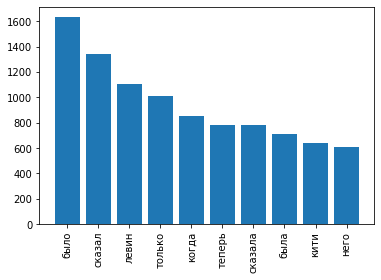

In [17]:
import matplotlib.pyplot as plt
import numpy as np

words = [ x[0] for x in mf[:10]]
freqs = [ x[1] for x in mf[:10]]


plt.bar(np.arange(10),freqs)
plt.xticks(np.arange(10),words,rotation=90)
plt.show()

### Заключение

1. Не обязательно знать все детали синтаксиса языка Python - много решений типовых задач можно найти в интернет, в частности, на сайте [StackOverflow](http://stackoverflow.com) (но они находятся через обычный текстовый поиск яндекса)
2. Иногда можно одно и то же сделать по-разному, и по мере совершенствования навыков у вас будет получатся делать всё более красивые вещи.
3. Почитать книгу по тонкостям программирования на Python (например, [такую](https://www.litres.ru/beyder-d/chistyy-python-tonkosti-programmirovaniya-dlya-profi-39123332/)) тоже может оказаться полезным, хотя стоит предпочесть чтению решение практических задач.
